In [170]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The three different supermarket sales Datasets based on three different cities:
1. Mandalay
2. Naypyitaw
3. Yangon

These datasets are merged together to perform the ananlysis and named as 'Merged_Dataset.csv'.

In [171]:
# Read CSV files into pandas DataFrames
df1 = pd.read_csv('Datasets/Mandalay_data.csv')
df2 = pd.read_csv('Datasets/Naypyitaw_data.csv')
df3 = pd.read_csv('Datasets/Yangon_data.csv')

# Merge DataFrames
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# Write the merged DataFrame to a new CSV file
merged_df.to_csv('Merged_Dataset.csv', index=False)

Data Insight using sales.head()

In [172]:
#importing data set
sales = pd.read_csv("Merged_Dataset.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17:03,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4


When processing, clean data is an essential component in all areas. Correct data corruption repair and performance concerns are aided by it.There are 17 columns and roughly 1000 entries to deal with. None of the columns contain null values.
Checking the null values.

In [173]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Finding the data types of the attributes of the dataset.

In [174]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

We noticed that the Date column has an object datatype rather than a Date datatype. We must change the object data type to a Date data type.
To make the "date," "day," "month," "year," "time," and "hour" easier to understand and process,
we must convert them to a certain format.

In [175]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Date']

0     2019-02-20
1     2019-02-06
2     2019-03-09
3     2019-01-15
4     2019-03-11
         ...    
995   2019-03-22
996   2019-03-10
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

Date column's object data type converted into datetime.

In [176]:
sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

Data insight:

In [177]:
sales.set_index('Date',inplace =True)
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-20,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,13:27,Credit card,164.52,4.761905,8.226,5.9
2019-02-06,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,18:07,Ewallet,57.92,4.761905,2.896,4.5
2019-03-09,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,17:03,Cash,102.04,4.761905,5.102,6.8
2019-01-15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,16:19,Cash,562.32,4.761905,28.116,4.5
2019-03-11,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,15:30,Ewallet,80.60,4.761905,4.030,4.4


Previewing the updated data
The results of our code's processing of the data are shown in the table below. Pandas, a Python library, is used for this processing.

In [178]:
sales.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [179]:
sales.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [180]:
np.round(sales.corr(numeric_only=True), 2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


Correlation analysis:

The degree to which two variables are linearly related is known as correlation. An analysis of correlation shows if there is a positive, negative, or zero correlation between the variables. In the case of a positive correlation, both variables' values rise simultaneously, and in the case of a negative correlation, both variables' values fall. Correlation at zero means there is none.

The correlations between various variables can be seen using the seaborn heat map.

/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


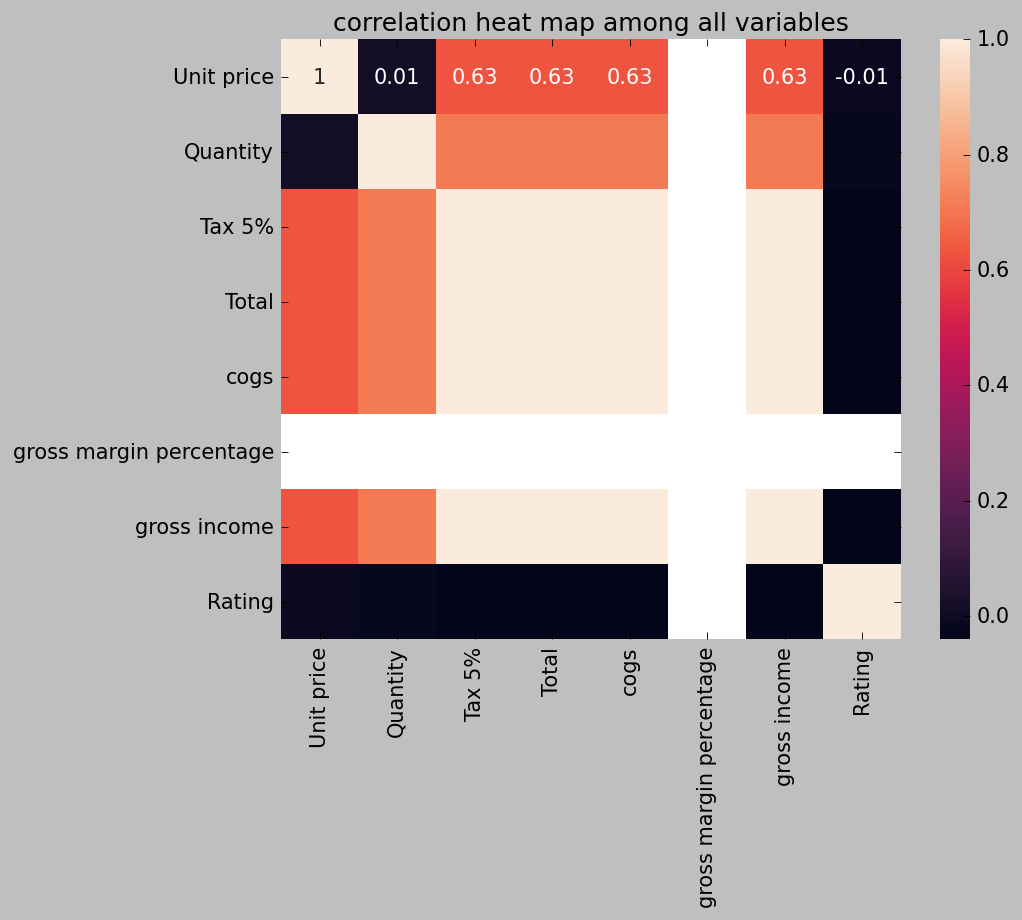

In [210]:
plt.figure(dpi=125)
sns.heatmap(np.round(sales.corr(numeric_only=True),2),annot=True)
plt.title("correlation heat map among all variables")
plt.show()

According to the above correlation heat map, the gross income, which is directly related to product sales, and the rating have a correlation of -0.04, meaning that they are not at all correlated, indicating that the gross income and rating are independent of one another and that the product's sales are not correlated with the rating.
Some other important observations from the correlation heat map are, From the plot we can observe that the unit price is positively correlated to the cost of goods sold by 63%. Tax 5%, Total, cogs and gross income have positively correlated with a correlation of 0.71 Another important observation is that ratings hardly have any correlation other variables.

Tax 5%, Total, and gross income are having correlation of 1 with cost of goods sold. From correlation analysis we can plot graphs. Below is a plot graph between Gross income and tax 5% for 500 observations.

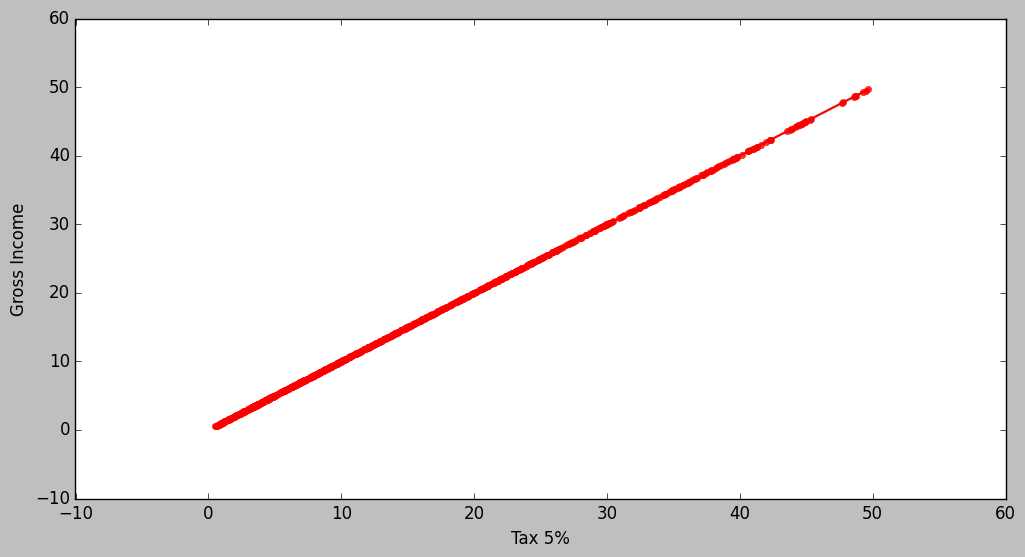

In [182]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=sales,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

From the above plot we can observe that the gross income and Tax 5% are linearly correlated.

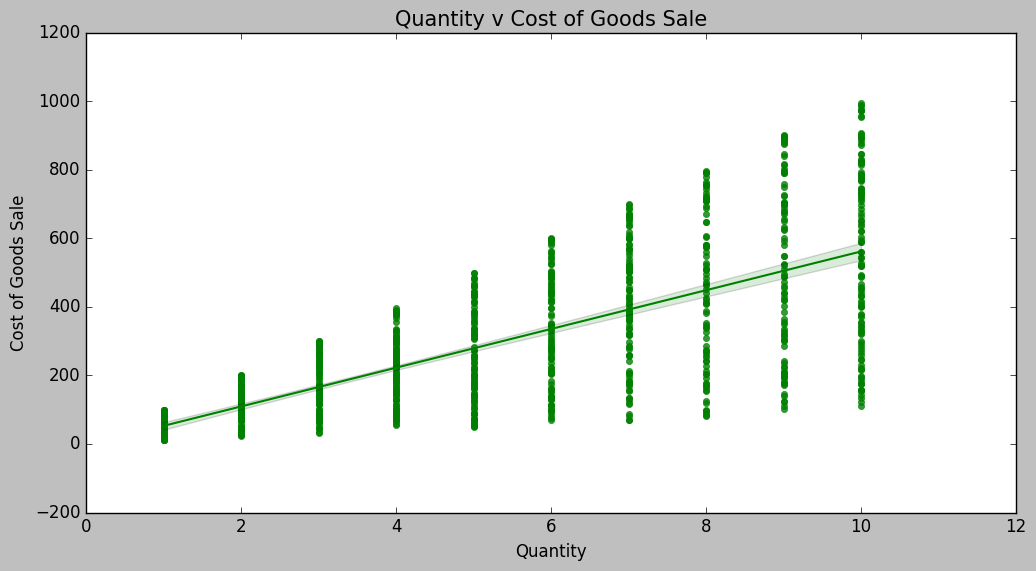

In [183]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=sales,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

In the above graph, the relation among the cost of the goods and quantity is shown by taking cost of goods sale on y axis and quantity on x axis.

Below is the graph for Gross income vs unit price

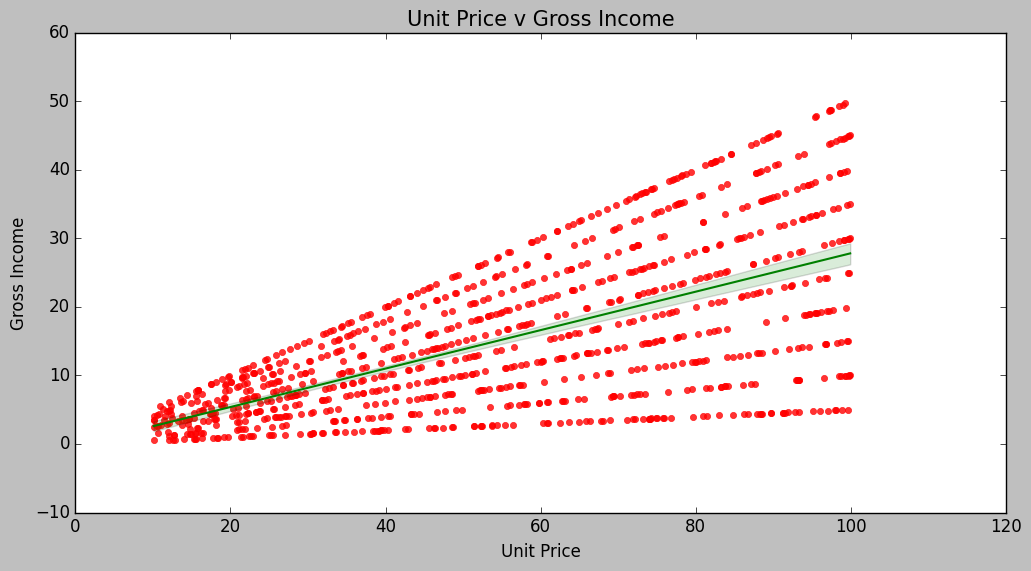

In [184]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=sales,scatter_kws={"color": "red"}, line_kws={"color": "green"})
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

From above, Gross income and unit price have a correlation of 0.63 and they are linearly correlated this implies that gross income varies linearly with the unit price of the product

Below graph is for Density plot of rating (Numpy, n.d.) (Seaborn, n.d.)

Text(0.5, 1.0, ' density plot')

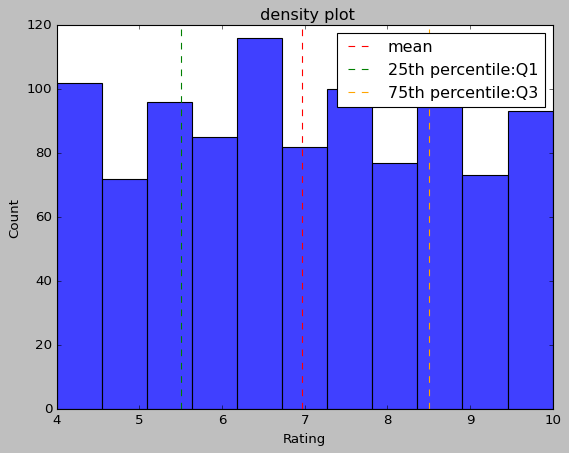

In [188]:
sns.histplot(sales['Rating'])
plt.axvline(x=np.mean(sales['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(sales['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(sales['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()
plt.title(" density plot")

From above, the rating distribution appears to be uniform, and neither the left nor the right side of the distribution appears to be skewed. To further illustrate this, we can plot both the mean and the percentiles. The green and orange lines represent the 25th and 75th percentiles, respectively, while the red dot in the lime represents the mean. The average rating for all goods is 7.

The below graph is for understanding which branch is having more sales.

A    340
B    332
C    328
Name: Branch, dtype: int64


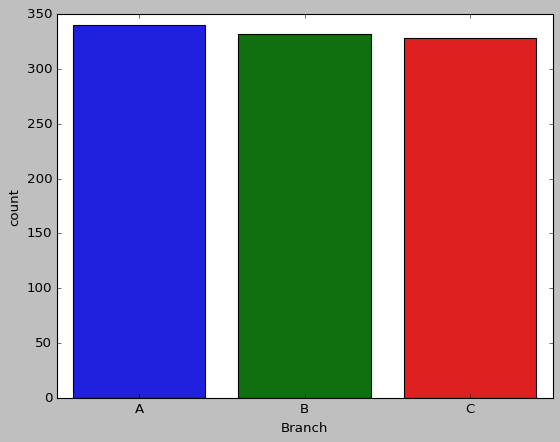

In [189]:
# Convert 'Branch' column to categorical data
sales['Branch'] = sales['Branch'].astype('category')

# Create a count plot for the 'Branch' column
sns.countplot(x='Branch', data=sales)

# Display the counts of each category in the 'Branch' column
print(sales['Branch'].value_counts())


As seen above, Between the three branches of A, B, and C, there is not much of a variation in sales. Branch A has slightly higher sales than the other branches.

The below graph is for understanding the popular payment method used by the customers:

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


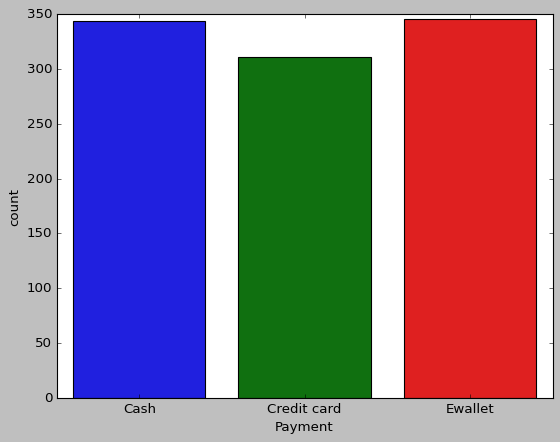

In [190]:
# Convert 'Payment' column to categorical data
sales['Payment'] = sales['Payment'].astype('category')

# Create a count plot for the 'Payment' column
sns.countplot(x='Payment', data=sales)

# Display the counts of each category in the 'Payment' column
print(sales['Payment'].value_counts())

As seen above Ewallet and Cash are more popular than Credit Card payments.

Below is a scatter plot to understand the 'Effect of rating provided by the customers on gross income'.
Scatter Plot of Gross Income vs Rating.

<Axes: xlabel='Rating', ylabel='gross income'>

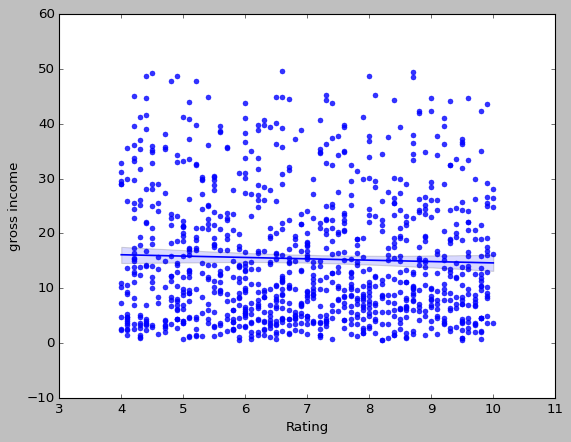

In [192]:
# Convert 'gross income' column to numeric
sales['gross income'] = pd.to_numeric(sales['gross income'], errors='coerce')

# Create a regression plot for 'Rating' against 'gross income'
sns.regplot(x='Rating', y='gross income', data=sales)

As seen above, There is no correlation between a customer's gross income and his rating, as is seen from the scatter plot and the trend line, both of which are remarkably flat.

Below graph is to understand, which branch is more profitable
Using seaborn and box plot function I have created a box plot taking branch on x axis and gross income on y axis
Boxen Plot: What is it?
With the exception of the fact that it depicts various quartile values, the Boxen plot and the box plot are extremely similar. We can better grasp the shape of the distribution, especially at the head and tail ends, by plotting several quartile values.

<Axes: xlabel='Branch', ylabel='gross income'>

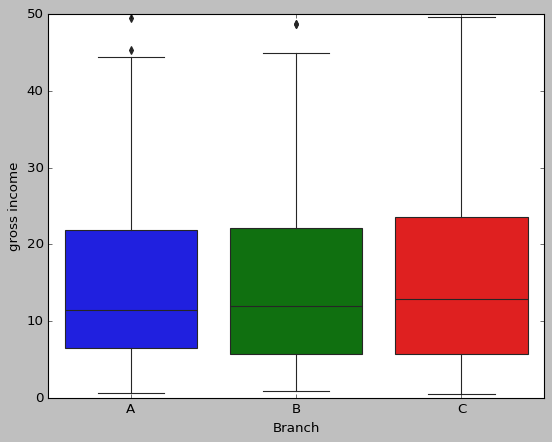

In [193]:
sns.boxplot(x=sales['Branch'], y=sales['gross income'])

As seen above, On average, there aren't much differences in gross income between branches. Branch C earns somewhat more money than either A or B. Although branch A's revenues are marginally higher than the rest, as was previously noted.

The below graph is to understand, Does the gender of a person affect their income?
I have drawn a box plot using seaborn and box plot taking gender on x axis and gross income on y axis in python.

<Axes: xlabel='Gender', ylabel='gross income'>

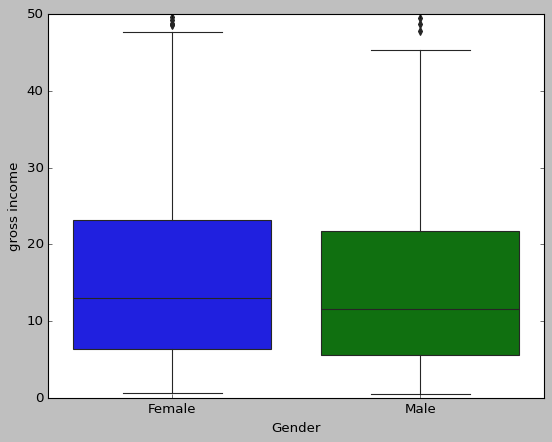

In [198]:
sns.boxplot(x=sales['Gender'], y=sales['gross income'])

As seen above, Male and female consumers make about the same amount of money overall, but female customers spend slightly more around the 75th percentile.

The below graph is to understand, Which product category brings in the most money?

<Axes: xlabel='Product line', ylabel='gross income'>

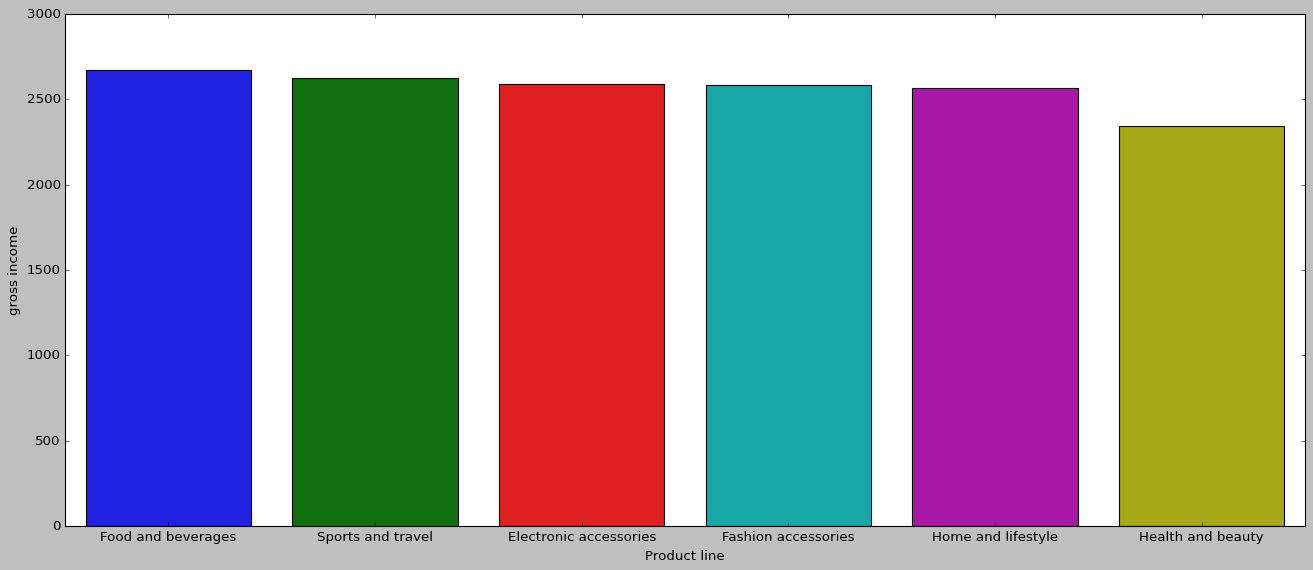

In [200]:
cat=sales[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)

The below graph compares payment distributions among the individual branches.
Using seaborn and counter plot function I have created a bar graph taking mode of payment on x axis using python.

Text(0, 0.5, 'Peple Count')

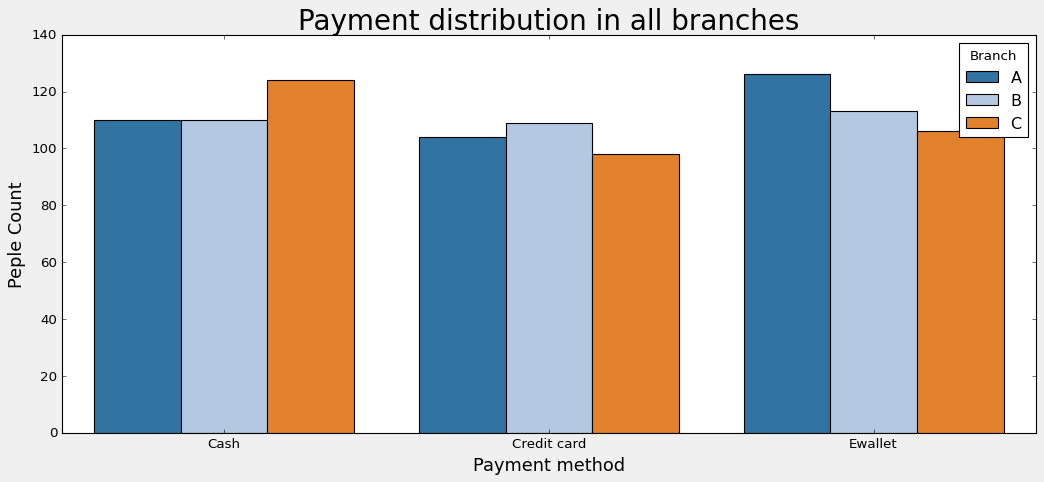

In [202]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.countplot(x="Payment", hue = "Branch", data = sales, palette= "tab20")
ax.set_title(label = "Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 16)

1. As seen above, cash transactions are highest in branch C , and equal in the other branches.
2. As seen above, the Credit Card payments are highest in branch B  followed by branch A  and branch C .
3. As seen above, the Ewallet payments are maximum in branch A, followed by branch B  and branch C .

The below graph is to understand the rating distribution in individual branches
I have drawn a box plot using seaborn and box plot function in python taking branches variable on x axis and rating variable on y axis with data from sales data set.

Text(0, 0.5, 'Rating distribution')

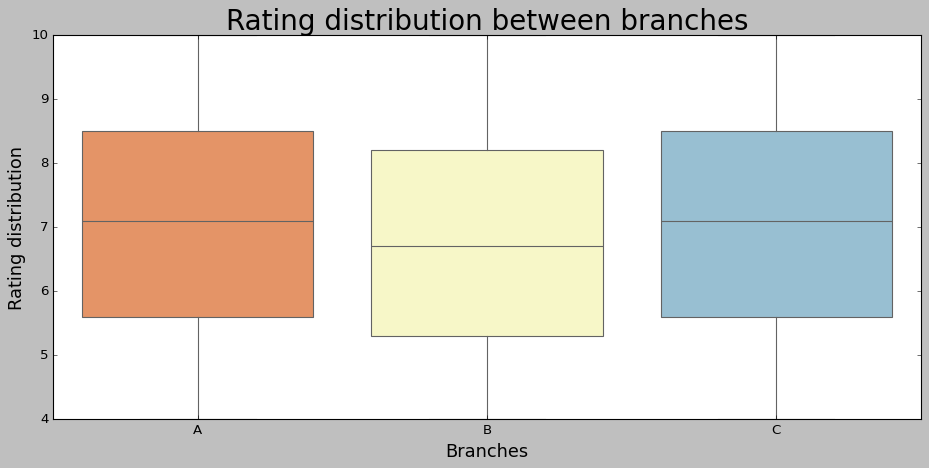

In [203]:
plt.figure(figsize=(14,6)) 
ax = sns.boxplot(x="Branch", y = "Rating" ,data =sales, palette= "RdYlBu")
ax.set_title("Rating distribution between branches", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Rating distribution", fontsize = 16)

The below graph is for finding sale of each product in the three cities.
Taking count on x axis and product type on y axis taking city as hue I plotted a bar graph using python taking count plot and seaborn as functions.

From the above box plot it is evident that branches A and C have average ratings more than seven, while branch B has a rating below seven.

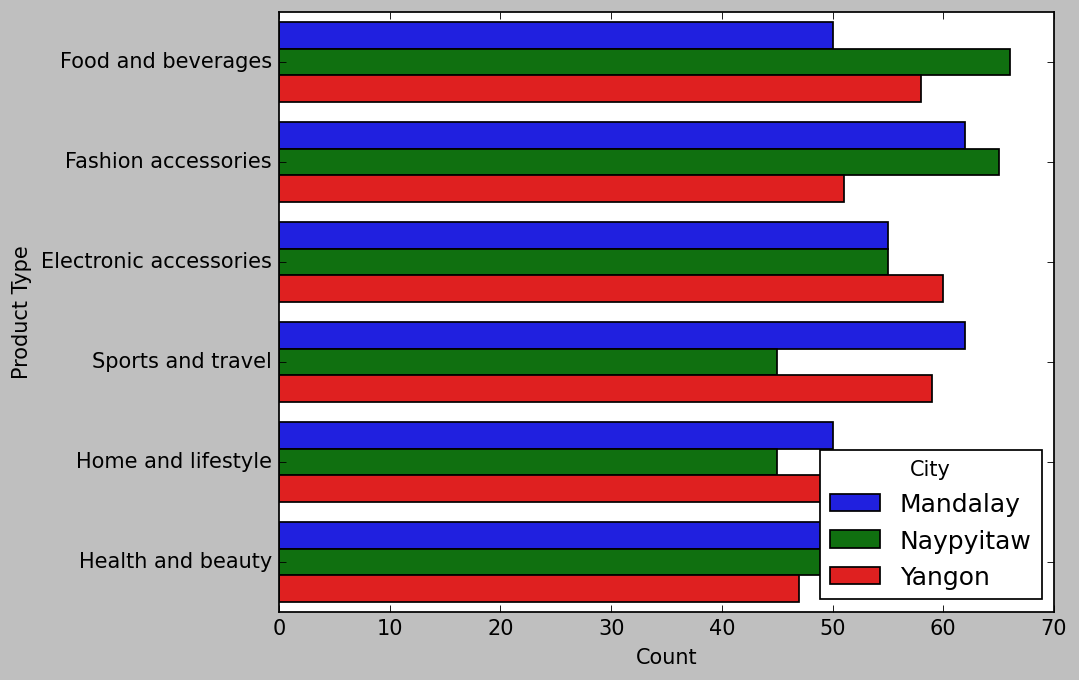

In [204]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

From the above graph we can conclude that well Yangon leads at Home & Lifestyle and Electronic accessories.
Naypyitaw leads at Food & Beverages and Fashion accessories. Mandalay leads at Sports & Travel and Health & Beauty

The below graph is for Determining the most popular payment method for the City, Branch, and Product Type
Takin count on x axis and product type on y axis taking hue as a payment I was able to find the most popular type of payment used for different type of city ,branch and product type using seaborn and countplot as functions in python.

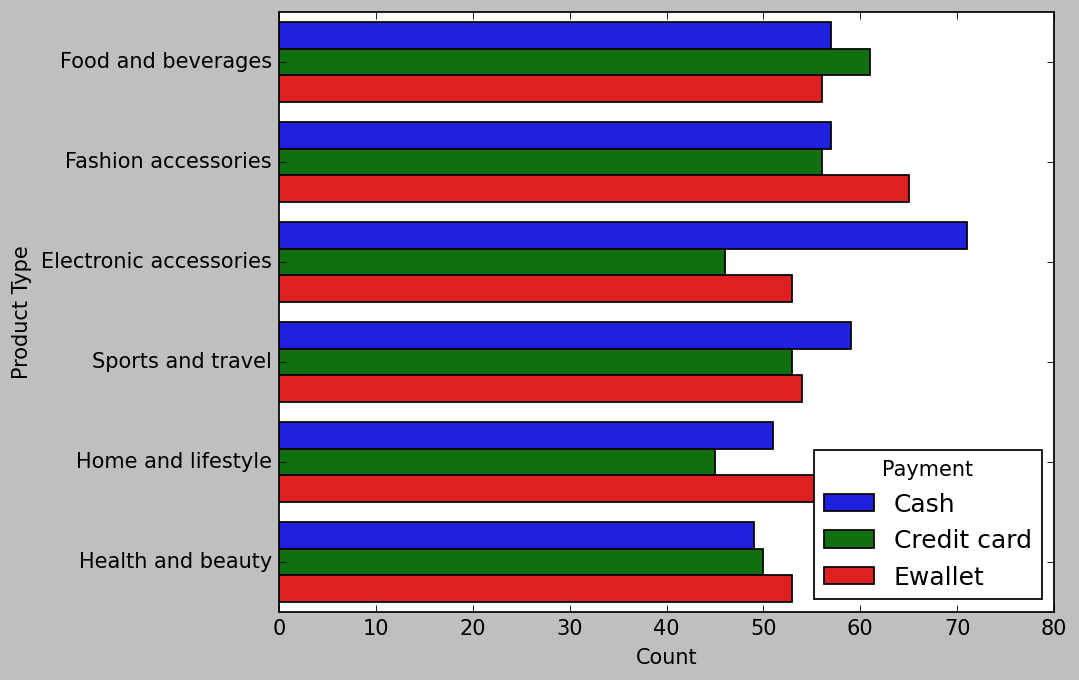

In [205]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Payment", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

From the above plot we can observe that e wallet is most common mode of payment in health and beauty, home and life style , fashion accessories whereas cash in electronic accessories ,sports and travel while credit card is mostly used in purchasing food and beverages.

The below graph is for Finding which city is the most busiest ?
After taking city on x axis and count on y axis using seaborn and count plot in python we got the following output.

Yangon - 340
Naypyitow - 328
Mandalay - 332


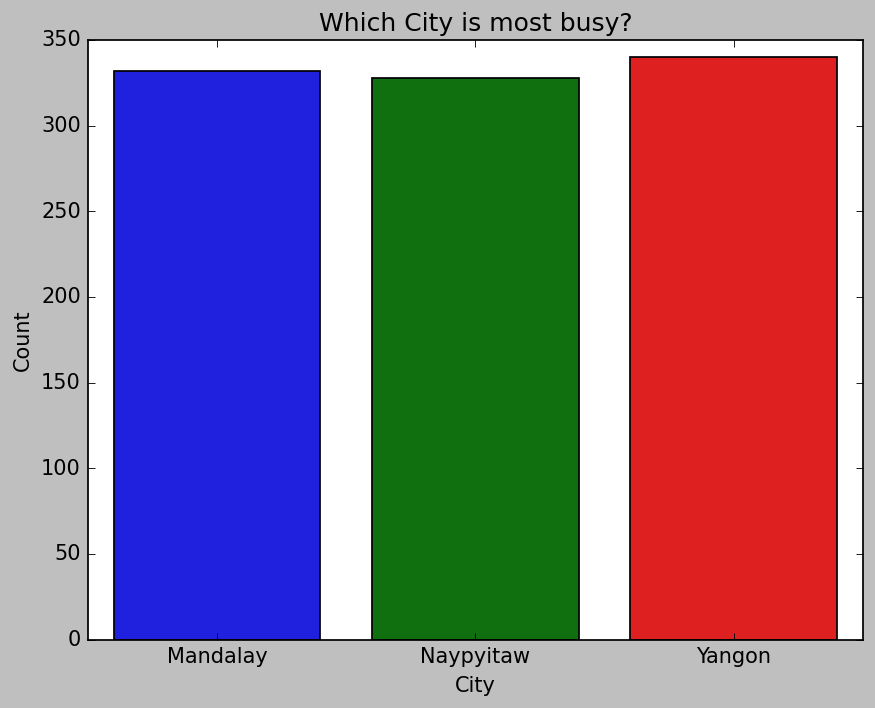

In [206]:

plt.figure(dpi=125)
sns.countplot(x='City', data=sales)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Which City is most busy?')

A, B, C = sales['City'].value_counts()

print('Yangon -', A)
print('Naypyitow -', C)
print('Mandalay -', B)

plt.show()

From the above plot we can observe that Yangon is the busiest city followed by Mandalay and Naypyitaw City. This depends on a lot of factors not only on the location. it depends on a lot of factors such as time, month, location, product type payment method.

In below graph i took unit price on x axis and demand on y axis from the above plot we can conclude that the price of the product does not have any effect on the demand.

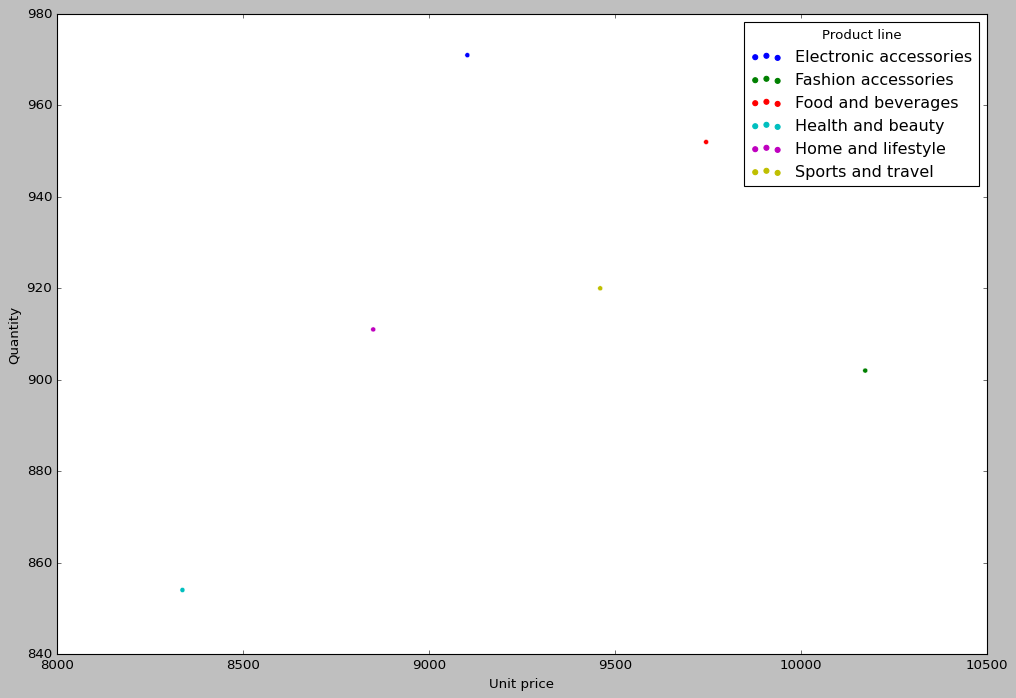

In [211]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=Quantity_bought,x='Unit price', y="Quantity", hue='Product line');

------------------------------------------------------------------ RESULTS --------------------------------------------------------------

Inference:
1. The supermarket received a fair 7 out of 10, on average. For a supermarket aiming to increase sales and profit margins, this is not good enough. Owner should make an effort to enhance client purchasing experience. The client is king, as the phrase goes.
2. We can observe through an investigation of the relationship between unit price and quantity using a scatterplot that demand for commodities is not always influenced by price. The owner should therefore buy more of the things that are thought to be more expensive in order to increase profits.


Challenges faced:
1. I utilized the data set of 500 observations for the scatter plots in order to make them understandable and clear, and the data set of 1000 observations for the other models because if I use a sample of data for the bar plots, the results will be altered from the original findings. Thus, I simply used a sample of the data for scatter plots.
2. I found that, contrary to what I had previously thought, the Date and Time columns actually include an object datatype by looking at the details of the data collection. I have to switch the object data type to a Date data type as a result. After changing the data type, I had to follow a specific format for the "date," "day," "month," "year," "time," and "hour." I then had to check the data set for any missing values;



Analysis results:
To perform fundamental EDA on the data from the supermarket sales, we performed univariate, bivariate, and correlation analysis.
The following is a summary of some of the data's results and observations:

1. There is no correlation between gross income and customer ratings, which are more or less uniform with a mean rating of roughly 7.A scatter plot with a trend line between gross income and rating was created using a scatter plot node. We can infer that gross income does not significantly affect customer stratification rating because the trend line is very flat.

2. There are 3 cities/branches in the data. Branch C, or Naypyitaw, is the most profitable branch in terms of gross income, despite the fact that branch A has slightly larger sales than the others.
SUPERMARKET SALES DATA ANALYSIS 22

3. E-wallets are the most widely used payment option, however cash payments are also common.

4. Each item's price is evenly spread out from 10 to 100.

5. Male and female consumers make about the same amount of money overall, but female customers spend slightly more around the 75th percentile.
One intriguing finding from the correlation research is that customer reviews are unrelated to any variable.

6.The quantity demanded is unaffected by price.

8.The majority of shoppers gave the supermarket fair reviews.